En este notebook de Colab está el código y la documentación de lo que realizamos en el proyecto para comparar el uso de diferentes herramientas de bases de datos avanzadas. 
La siguiente información es sobre el uso de Cassandra DB como base de datos y Apache Spark para realizar las consultas sobre conjuntos de datos.

# Cassandra DB




## Instalación y configuración
Los siguientes códigos se relacionan a la instalación e importación de librerias, también la configuración básica para conectar este Notebook a la base de datos. 

Para la utilización de base de datos decidimos utilizar el servicio de datastax llamado AstraDB, basado en Cassandra, que nos facilita la administración e utilización en linea, ya que se encuentra en la nube y con una fácil conexión a python desde Colab. Cumple con las características de la base de datos NoSQL Cassandra y la utilizamos como tal. 

In [1]:
!pip install cassandra-driver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 72.7 MB/s eta 0:00:00


In [2]:
import cassandra
print(cassandra.__version__)

3.28.0


In [3]:
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider

cloud_config= {
  'secure_connect_bundle': '/content/secure-connect-projectcassandra.zip'
}
auth_provider = PlainTextAuthProvider('LUATCfkXsPcfnsMJZkTjBxJe', 'ZWjZJUnj7,FpOA9R5kX,hwRmOpxaUxZL0qTPooeqK_yy2fxO_bA-WUvZRc0GXmC6K9MZZsvbQ8OXMSZ3,-WKNrH8ZpXc091WEeuqXLyuFto2j3n6SwMpaDlxQsE.LchA')
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect("dbacassandra")



ERROR:cassandra.connection:Closing connection <AsyncoreConnection(140437876167376) 4b0d5792-571a-439f-a322-58572054bc1a-us-east1.db.astra.datastax.com:29042:7daef3a3-819c-428a-8344-e0cc6064e144> due to protocol error: Error from server: code=000a [Protocol error] message="Beta version of the protocol used (5/v5-beta), but USE_BETA flag is unset"


## Ingreso de datos a la base de datos.
En los siguientes bloques de código, utilizamos los comandos para insertar los datos de nuestro csv a la base de datos. Primero creamos la tabla con las columnas que definimos y luego exportamos los datos a la base de datos, gracias a la conexión que tenemos con el servicio de AstraDB.

In [4]:
import csv
query = """
    CREATE TABLE IF NOT EXISTS dbinscripciones (
        nombre text,
        cedula text,
        genero text,
        edad int,
        correo text,
        programa text,
        ciudad text,
        jornada text,
        periodo text,
        semestre text,
        asignatura_codigo text,
        asignatura_nombre text,
        docente text,
        intensidad_horaria int,
        cantidad_estudiantes int,
        nota int,
        PRIMARY KEY (cedula)
       )
    """
session.execute(query)

In [12]:
with open('/content/initial.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file)
    for row in csv_reader:
      query = """
          INSERT INTO dbinscripciones (
              nombre, cedula, genero, edad, correo, programa, ciudad,
              jornada, periodo, semestre, asignatura_codigo, asignatura_nombre,
              docente, intensidad_horaria, cantidad_estudiantes, nota
          )
          VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
      """
      session.execute(query, (
          row[0], row[1], row[2], int(row[3]), row[4], row[5], row[6],
          row[7], row[8], row[9], row[10], row[11], row[12], int(row[13]),
          int(row[14]), int(row[15])
      ))


## Consulta de los datos
También utilizando la conexión con AstraDB, podemos ejecutar consultas. En los siguientes bloques de código realizamos una consulta de todos los datos, y los almacenamos con las herramientas de numpy y visualizamos con un dataframe de pandas que nos facilita python.

In [5]:
rows=session.execute(" SELECT * FROM dbinscripciones")

In [6]:
import numpy as np

rows = session.execute(" SELECT * FROM dbacassandra.dbinscripciones")

nombre=[]
cedula=[]
genero=[]
edad=[]
correo=[]
programa=[]
ciudad=[]
jornada=[]
periodo=[]
semestre=[]
asignatura_codigo=[]
asignatura_nombre=[]
docente=[]
intensidad_horaria=[]
cantidad_estudiantes=[]
nota=[]


for row in rows:
    nombre.append(row.nombre)
    cedula.append(row.cedula)
    genero.append(row.genero)
    edad.append(row.edad)
    correo.append(row.correo)
    programa.append(row.programa)
    ciudad.append(row.ciudad)
    jornada.append(row.jornada)
    periodo.append(row.periodo)
    semestre.append(row.semestre)
    asignatura_codigo.append(row.asignatura_codigo)
    asignatura_nombre.append(row.asignatura_nombre)
    docente.append(row.docente)
    intensidad_horaria.append(row.intensidad_horaria)
    cantidad_estudiantes.append(row.cantidad_estudiantes)
    nota.append(row.nota)
    
    
    
    
table_data = np.column_stack((nombre, cedula, genero, edad, correo, programa, ciudad, jornada, periodo, semestre, asignatura_codigo, asignatura_nombre, docente, intensidad_horaria, cantidad_estudiantes, nota))



In [7]:
import pandas as pd
df = pd.DataFrame(table_data, columns=["nombre", "cedula", "genero", "edad", "correo", "programa", "ciudad", "jornada", "periodo", "semestre", "asignatura_codigo", "asignatura_nombre", "docente", "intensidad_horaria", "cantidad_estudiantes", "nota"])

display(df)

,nombre,cedula,genero,edad,correo,programa,ciudad,jornada,periodo,semestre,asignatura_codigo,asignatura_nombre,docente,intensidad_horaria,cantidad_estudiantes,nota
0,Rojas Santos Vanessa,1028860023,Femenino,18,vrojass222@cen.edu.co,AUXILIAR EN CLINICA VETERINARIA - Diurna,Funza,Diurna,2023-1,2 Semestre,ANIMALES DE PRODUCCION - Diurna,Animales de Producción F1 (Funza) - Diurna,Bernardo Martinez,32,22,36
1,Gomez Castro Monica Tatiana,1024472199,Femenino,35,mtgomezc231@cen.edu.co,AUXILIAR EN CLINICA VETERINARIA - Sabatina,Bogotá,Sabatina,2023-1,1 Semestre,ANIMALES DE COMPAÑIA - Sabatina,Animales de Compañía S1 - Sabatina,Henry Portilla,32,48,44
2,Gutierrez Rodriguez Luisa Dayana,1072188820,Femenino,17,ldgutierrezr222@cen.edu.co,AUXILIAR EN CLINICA VETERINARIA - Diurna,Bogotá,Diurna,2023-1,2 Semestre,ANIMALES DE PRODUCCION - Diurna,Animales de Producción A2 - Diurna,Bernardo Martinez,32,26,27
3,Niño Matallana Samuel,1019985521,Masculino,17,sninom221@cen.edu.co,AUXILIAR EN ENFERMERIA - Diurna,Funza,Diurna,2023-1,3 Semestre,ADMINISTRACION DE MEDICAMENTOS - Diurna,Administración de Medicamentos F1 - Diurna,Wilmer Salazar,32,16,49
4,Rodriguez Castro Ailin Gabriela,1028861076,Femenino,16,agrodriguezc231@cen.edu.co,AUXILIAR EN CLINICA VETERINARIA - Diurna,Funza,Diurna,2023-1,1 Semestre,ANIMALES DE COMPAÑIA - Diurna,Animales de Compañía F1 (Funza) - Diurna,Henry Portilla,32,38,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,Rivera Martinez Candelaria Maria,32890530,Femenino,44,cmriveram231@cen.edu.co,AUXILIAR EN ENFERMERIA - Sabatina,Funza,Sabatina,2023-1,1 Semestre,ADULTO MAYOR - Sabatina,Adulto Mayor S1 - Sabatina,Mario Puche,32,16,50
500,Orduña Barrero Yuly Stephania,1023367211,Femenino,18,ysordunab222@cen.edu.co,AUXILIAR EN CLINICA VETERINARIA - Nocturna,Bogotá,Nocturna,2023-1,2 Semestre,ANIMALES DE PRODUCCION - Nocturna,Animales de Producción B1 - Nocturna,Bernardo Martinez,32,35,45
501,Molano Perez Jeimmy Tatiana,1069745083,Femenino,29,jtmolanop221@cen.edu.co,AUXILIAR EN CLINICA VETERINARIA - Diurna,Bogotá,Diurna,2023-1,2 Semestre,ANIMALES DE PRODUCCION - Diurna,Animales de Producción A2 - Diurna,Bernardo Martinez,32,26,41
502,Jaime Peña Mariana,1003510206,Femenino,20,mjaimep231@cen.edu.co,AUXILIAR EN CLINICA VETERINARIA - Diurna,Funza,Diurna,2023-1,1 Semestre,ANIMALES DE COMPAÑIA - Diurna,Animales de Compañía F1 (Funza) - Diurna,Henry Portilla,32,38,36


# SPARK

## Instalación y configuración
Para la consulta de datos, utilizamos pyspark que nos facilita el uso de map reduce y otras herramientas de manejo de datos.
Primero hacemos la instalación e importación, y luego se conecta con la base de datos de AstraDB, que nos deja utilizar una sesión y nos importa los datos como un dataframe, con el cual podemos utilizar las funciones de spark para definir nuestras consultas.

In [4]:
!pip install pyspark


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=86fef9c211f90f41d461e28c7607c4b4a326f8d1073eeea7f25a616d0a686efa
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [8]:
from pyspark.sql import SparkSession

# Crear una instancia de SparkSession con la dependencia del conector Cassandra
spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.jars", "/content/spark-cassandra-connector_2.12-3.3.0.jar") \
    .config("spark.cassandra.connection.config.cloud.path", "/content/secure-connect-projectcassandra.zip") \
    .config("spark.cassandra.auth.username", "LUATCfkXsPcfnsMJZkTjBxJe") \
    .config("spark.cassandra.auth.password", "ZWjZJUnj7,FpOA9R5kX,hwRmOpxaUxZL0qTPooeqK_yy2fxO_bA-WUvZRc0GXmC6K9MZZsvbQ8OXMSZ3,-WKNrH8ZpXc091WEeuqXLyuFto2j3n6SwMpaDlxQsE.LchA") \
    .config("spark.cassandra.connection.config.cloud.name", "projectcassandra") \
    .getOrCreate()

# Cargar datos de Cassandra en un DataFrame

spark=SparkSession.builder.getOrCreate()
df_spark= spark.createDataFrame(df)


# Mostrar el DataFrame
df_spark.show()


+--------------------+----------+---------+----+--------------------+--------------------+------+--------+-------+----------+--------------------+--------------------+-----------------+------------------+--------------------+----+
|              nombre|    cedula|   genero|edad|              correo|            programa|ciudad| jornada|periodo|  semestre|   asignatura_codigo|   asignatura_nombre|          docente|intensidad_horaria|cantidad_estudiantes|nota|
+--------------------+----------+---------+----+--------------------+--------------------+------+--------+-------+----------+--------------------+--------------------+-----------------+------------------+--------------------+----+
|Rojas Santos Vanessa|1028860023| Femenino|  18|vrojass222@cen.ed...|AUXILIAR EN CLINI...| Funza|  Diurna| 2023-1|2 Semestre|ANIMALES DE PRODU...|Animales de Produ...|Bernardo Martinez|                32|                  22|  36|
|Gomez Castro Moni...|1024472199| Femenino|  35|mtgomezc231@cen.e...|AUXILIA

In [9]:
from pyspark.sql.functions import col, sum, avg
df_spark=df_spark.withColumn("intensidad_horaria",col("intensidad_horaria").cast("integer"))

## Consultas
A continuación definimos unas consultas con las cuales mostramos la utilización de spark.

### Tipo de jornada por programa

In [92]:
from pyspark.sql.functions import collect_set
reqProgram= df_spark.groupBy('programa').agg(collect_set("jornada").alias("jornadas"))

In [93]:
reqProgram.show(truncate=False)

+-------------------------------------------------+----------+
|programa                                         |jornadas  |
+-------------------------------------------------+----------+
|AUXILIAR EN ENFERMERIA - Sabatina                |[Sabatina]|
|INVESTIGADOR CRIMINALÍSTICO Y JUDICIAL - Nocturna|[Nocturna]|
|AUXILIAR EN CLINICA VETERINARIA - Sabatina       |[Sabatina]|
|AUXILIAR EN ENFERMERIA - Diurna                  |[Diurna]  |
|AUXILIAR EN CLINICA VETERINARIA - Nocturna       |[Nocturna]|
|AUXILIAR EN CLINICA VETERINARIA - Diurna         |[Diurna]  |
|INVESTIGADOR CRIMINALÍSTICO Y JUDICIAL - Diurna  |[Diurna]  |
+-------------------------------------------------+----------+



### Intensidad horaria por Asignatura

In [97]:
resultSum = df_spark.groupBy('asignatura_nombre').agg(avg(col('intensidad_horaria')).alias('Intensidad Horaria'))

In [98]:
resultSum.show(truncate=False)

+--------------------------------------------+------------------+
|asignatura_nombre                           |Intensidad Horaria|
+--------------------------------------------+------------------+
|Animales de Producción F1 (Funza) - Diurna  |32.0              |
|Anatomía Forense A2 - Diurna                |32.0              |
|Accidentología Vial A1 - Diurna             |64.0              |
|Animales de Compañía A2 - Diurna            |32.0              |
|Animales de Compañía B1 - Nocturna          |32.0              |
|Animales de Producción A2 - Nocturna        |32.0              |
|Animales de Producción A3 - Sabatina        |32.0              |
|Accidentología Vial F1 (Funza) - Diurna     |64.0              |
|Accidentología Vial B1 - Nocturna           |64.0              |
|Adulto Mayor F1 - Diurna                    |32.0              |
|Animales de Compañía S1 - Sabatina          |32.0              |
|Anatomía S1 - Sabatina                      |64.0              |
|Adulto Ma

### Intensidad horaria por docente

In [99]:
resultSum2= df_spark.groupBy('docente').agg(avg(col('intensidad_horaria')).alias('suma_intensidad'))
resultSum2.show(truncate=False)

+-----------------+---------------+
|docente          |suma_intensidad|
+-----------------+---------------+
|Angie Silva      |32.0           |
|Mario Puche      |32.0           |
|Henry Portilla   |32.0           |
|Dazaeth Rojas    |64.0           |
|Sergio Gonzalez  |64.0           |
|Wilmer Salazar   |32.0           |
|Diana Puche      |64.0           |
|Bernardo Martinez|32.0           |
|Gerson Aldana    |32.0           |
+-----------------+---------------+



### Promedio de intensidades horarias 

In [110]:
resultTotal=df_spark.agg({"intensidad_horaria": "avg"})
resultTotal.show()

+-----------------------+
|avg(intensidad_horaria)|
+-----------------------+
|     37.523809523809526|
+-----------------------+



### Promedio de intensidad horaria por programa

In [101]:
resultSum3= df_spark.groupBy('programa').agg(avg(col('intensidad_horaria')).alias('promedio_intensidad'))
resultSum3.show(truncate=False)

+-------------------------------------------------+-------------------+
|programa                                         |promedio_intensidad|
+-------------------------------------------------+-------------------+
|AUXILIAR EN ENFERMERIA - Sabatina                |32.0               |
|INVESTIGADOR CRIMINALÍSTICO Y JUDICIAL - Nocturna|48.0               |
|AUXILIAR EN CLINICA VETERINARIA - Sabatina       |43.45679012345679  |
|AUXILIAR EN ENFERMERIA - Diurna                  |32.0               |
|AUXILIAR EN CLINICA VETERINARIA - Nocturna       |32.0               |
|AUXILIAR EN CLINICA VETERINARIA - Diurna         |32.15686274509804  |
|INVESTIGADOR CRIMINALÍSTICO Y JUDICIAL - Diurna  |51.111111111111114 |
+-------------------------------------------------+-------------------+



### Notas de los estudiantes

In [114]:
resultNotas = df_spark.select("nombre", "cedula", "asignatura_nombre", "nota")
resultNotas.show(truncate=False)

+----------------------------------+----------+------------------------------------------+----+
|nombre                            |cedula    |asignatura_nombre                         |nota|
+----------------------------------+----------+------------------------------------------+----+
|Rojas Santos Vanessa              |1028860023|Animales de Producción F1 (Funza) - Diurna|36  |
|Gomez Castro Monica Tatiana       |1024472199|Animales de Compañía S1 - Sabatina        |44  |
|Gutierrez Rodriguez Luisa Dayana  |1072188820|Animales de Producción A2 - Diurna        |27  |
|Niño Matallana Samuel             |1019985521|Administración de Medicamentos F1 - Diurna|49  |
|Rodriguez Castro Ailin Gabriela   |1028861076|Animales de Compañía F1 (Funza) - Diurna  |10  |
|Ruiz Ramirez Laura Alexandra      |1073250268|Anatomía S1 - Sabatina                    |32  |
|Sarmiento Ramirez Julieth Valeria |1021665511|Animales de Producción A3 - Diurna        |29  |
|Pinilla Morales Laura Fernanda    |1000

### Promedio general de notas


In [109]:
promedio_general = df_spark.agg({"nota": "avg"})
promedio_general.show()

+------------------+
|         avg(nota)|
+------------------+
|34.345238095238095|
+------------------+



### Promedio notas por Asignatura

In [22]:
promedio_por_asignatura = df_spark.groupBy("asignatura_nombre").agg(avg(col('nota')).alias('promedio notas'))
promedio_por_asignatura.show(truncate=False)

+--------------------------------------------+------------------+
|asignatura_nombre                           |promedio notas    |
+--------------------------------------------+------------------+
|Animales de Producción F1 (Funza) - Diurna  |29.863636363636363|
|Anatomía Forense A2 - Diurna                |29.307692307692307|
|Accidentología Vial A1 - Diurna             |38.0              |
|Animales de Compañía A2 - Diurna            |37.54545454545455 |
|Animales de Compañía B1 - Nocturna          |35.0              |
|Animales de Producción A2 - Nocturna        |29.0              |
|Animales de Producción A3 - Sabatina        |32.5              |
|Accidentología Vial F1 (Funza) - Diurna     |41.333333333333336|
|Accidentología Vial B1 - Nocturna           |39.125            |
|Adulto Mayor F1 - Diurna                    |30.529411764705884|
|Animales de Compañía S1 - Sabatina          |34.255319148936174|
|Anatomía S1 - Sabatina                      |33.285714285714285|
|Adulto Ma

### Promedio notas por estudiante

In [23]:
promedio_por_estudiante = df_spark.groupBy("cedula").agg(avg(col('nota')).alias('promedio notas'))
promedio_por_estudiante.show(truncate=False)

+----------+--------------+
|cedula    |promedio notas|
+----------+--------------+
|1015995680|42.0          |
|1018506203|10.0          |
|1032381276|40.0          |
|1069498832|43.0          |
|1007157152|29.0          |
|1001047245|26.0          |
|1023962963|26.0          |
|1000383028|30.0          |
|1073526163|49.0          |
|1025525392|32.0          |
|1001198781|31.0          |
|1028860023|36.0          |
|1014298865|44.0          |
|1073250268|32.0          |
|1015472722|34.0          |
|1070385523|10.0          |
|1000123877|34.0          |
|1016942114|41.0          |
|1000714080|36.0          |
|1014596095|36.0          |
+----------+--------------+
only showing top 20 rows



### Asignaturas por programa

In [59]:
from pyspark.sql.functions import collect_set
AsignProg= df_spark.groupBy('programa').agg(collect_set("asignatura_nombre").alias("Asignaturas"))

In [61]:
AsignProg.show(truncate=False)

+-------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|programa                                         |Asignaturas                                                                                                                                                                                                                                                                                                                                                                                         |
+-------------------------------------------------+-------------------------------------------------------------------

## Map reduce

### Cantidad de estudiantes por programa

Para esta consulta, de cantidad de estudiantes por programa, utilizamos map reduce, donde el número de veces que cuenta cada programa, es el número de inscripciones a ese programa, que a su vez, es el número de estudiantes inscritos:

In [104]:
from operator import add
rdd = df_spark.rdd

mapped_rdd = rdd.map(lambda row: (row['programa'], 1))
counts_rdd = mapped_rdd.reduceByKey(add)
results1 = counts_rdd.collect()
for programa, count in results1:
    print(f"Programa: {programa}, Cantidad de estudiantes: {count}")

Programa: AUXILIAR EN CLINICA VETERINARIA - Sabatina, Cantidad de estudiantes: 81
Programa: AUXILIAR EN CLINICA VETERINARIA - Nocturna, Cantidad de estudiantes: 67
Programa: AUXILIAR EN CLINICA VETERINARIA - Diurna, Cantidad de estudiantes: 204
Programa: AUXILIAR EN ENFERMERIA - Diurna, Cantidad de estudiantes: 34
Programa: INVESTIGADOR CRIMINALÍSTICO Y JUDICIAL - Diurna, Cantidad de estudiantes: 72
Programa: INVESTIGADOR CRIMINALÍSTICO Y JUDICIAL - Nocturna, Cantidad de estudiantes: 28
Programa: AUXILIAR EN ENFERMERIA - Sabatina, Cantidad de estudiantes: 18


### Cantidad de estudiantes por asignatura

Similar a la anterior consulta, en esta utilizamos map reduce para buscar el número de veces que se repite las asignaturas, así para buscar la cantidad de estudiantes inscritos a cada asignatura:

In [105]:
mapped_rdd = rdd.map(lambda row: (row['asignatura_nombre'], 1))
counts_rdd = mapped_rdd.reduceByKey(add)
results2 = counts_rdd.collect()
for asignatura_nombre, count in results2:
    print(f"Asignatura: {asignatura_nombre}, Cantidad de estudiantes: {count}")

Asignatura: Anatomía S1 - Sabatina, Cantidad de estudiantes: 28
Asignatura: Animales de Producción A1 - Diurna, Cantidad de estudiantes: 25
Asignatura: Animales de Compañía A2 - Diurna, Cantidad de estudiantes: 22
Asignatura: Animales de Producción S1 - Sabatina, Cantidad de estudiantes: 3
Asignatura: Animales de Compañía A1 - Diurna, Cantidad de estudiantes: 27
Asignatura: Adulto Mayor F1 - Diurna, Cantidad de estudiantes: 17
Asignatura: Adulto Mayor S1 - Sabatina, Cantidad de estudiantes: 15
Asignatura: Análisis de la Evidencia B1 - Diurna, Cantidad de estudiantes: 3
Asignatura: Accidentología Vial A1 - Diurna, Cantidad de estudiantes: 7
Asignatura: Animales de Producción B1 - Diurna, Cantidad de estudiantes: 4
Asignatura: Anatomía B1 - Diurna, Cantidad de estudiantes: 1
Asignatura: Análisis de la Evidencia B1 - Nocturna, Cantidad de estudiantes: 6
Asignatura: Anatomía B1 - Sabatina, Cantidad de estudiantes: 1
Asignatura: Adulto Mayor F1 - Sabatina, Cantidad de estudiantes: 2
Asignat

### Busqueda de palabras en los nombres de Asignaturas

Hacemos un map reduce de las palabras que están en los nombres de las asignaturas, así podemos ver que temática es más repetida en las inscripciones de los alumnos.

In [63]:
asignatura_df = df_spark.select("asignatura_nombre")
def mapper(row):
    return [(word, 1) for word in row.asignatura_nombre.split()]


In [65]:
word_counts = (
    df_spark.rdd
    .flatMap(mapper)
    .reduceByKey(lambda x, y: x + y)
    .toDF(["asignatura_palabra", "count"])
)


In [69]:
word_counts=word_counts.orderBy(word_counts["count"].desc())
word_counts.show()


+------------------+-----+
|asignatura_palabra|count|
+------------------+-----+
|                 -|  504|
|                de|  373|
|          Animales|  322|
|            Diurna|  310|
|          Compañía|  191|
|        Producción|  131|
|                F1|  115|
|                B1|  105|
|          Sabatina|   99|
|                S1|   95|
|          Nocturna|   95|
|           (Funza)|   79|
|                A2|   74|
|          Anatomía|   73|
|                A1|   72|
|                A3|   43|
|           Forense|   43|
|          Análisis|   35|
|                la|   35|
|         Evidencia|   35|
+------------------+-----+
only showing top 20 rows



## Gráficos


### Intensidad horaria por asignatura

In [26]:
import matplotlib.pyplot as plt

intensidad_horaria_por_asignatura = df_spark.groupBy("asignatura_nombre").sum("intensidad_horaria").collect()

In [27]:
valores = [fila["sum(intensidad_horaria)"] for fila in intensidad_horaria_por_asignatura]
etiquetas = [fila["asignatura_nombre"] for fila in intensidad_horaria_por_asignatura]

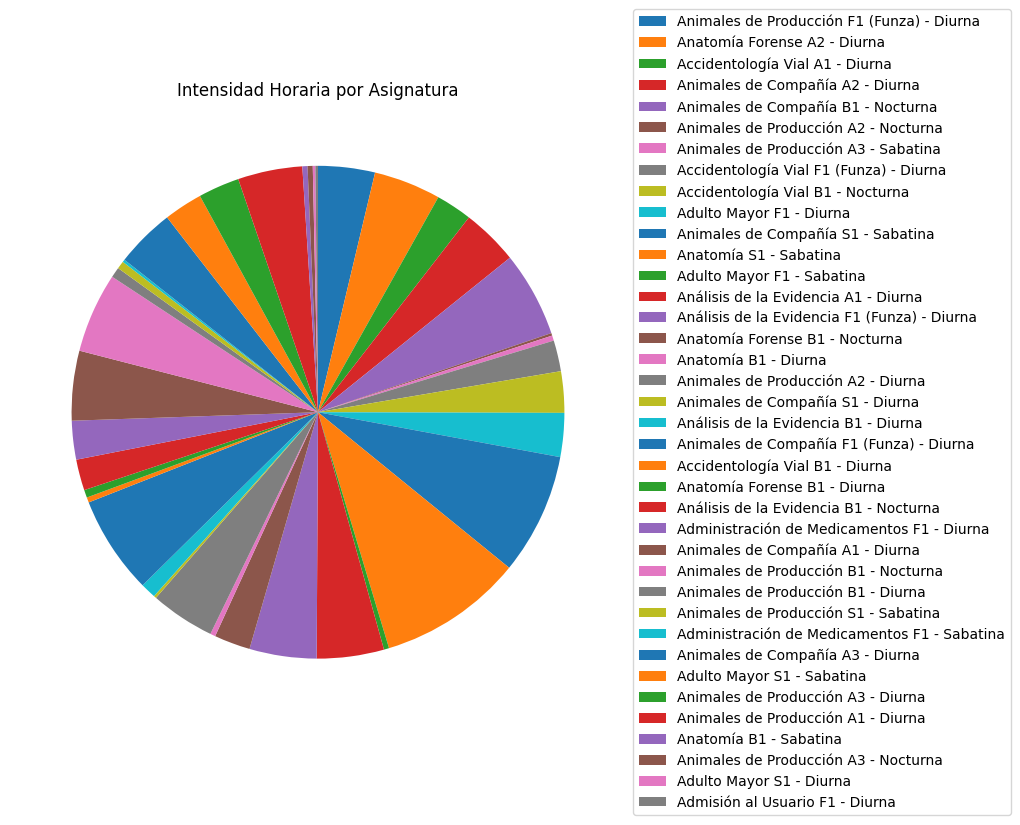

In [74]:

fig, ax = plt.subplots(figsize=(8, 8))
pie = ax.pie(valores, labels=None, startangle=90, counterclock=False)

plt.title("Intensidad Horaria por Asignatura",fontsize=12)
ax.legend(etiquetas, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


### Gráfico Barras: Mapeo de palabras 

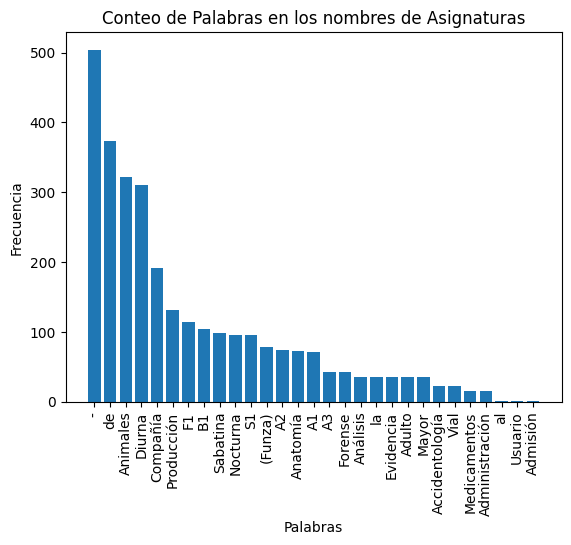

In [72]:
import matplotlib.pyplot as plt


nombres_asignatura = [row["asignatura_palabra"] for row in word_counts.collect()]
conteo = [row["count"] for row in word_counts.collect()]




plt.bar(nombres_asignatura, conteo)

plt.title("Conteo de Palabras en los nombres de Asignaturas")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")

# Rotar las etiquetas del eje x si son largas
plt.xticks(rotation=90)

plt.show()


# Exportar datos Json
Para compartir los resultados de las consultas en Spark, exportamos los diferentes dataframes generados en archivos JSON



In [76]:
output_consulta_general= "general.json"
df_spark.write.json(output_consulta_general)

In [95]:
reqProgram.write.json("jornadas_por_programa_")

In [106]:
resultSum.write.json("intensidad_horaria_por_asignatura")

In [107]:
resultSum2.write.json("intensidad_horaria_por_docente")

In [111]:
resultTotal.write.json("promedio_intensidades_horarias")

In [112]:
resultSum3.write.json("promedio_intensidad_horaria_por_programa")

In [115]:
resultNotas.write.json("resultado_notas_por_estudiante")

In [116]:
promedio_general.write.json("promedio_general_notas")

In [117]:
promedio_por_asignatura.write.json("promedio_notas_por_asignatura")

In [118]:
promedio_por_estudiante.write.json("promedio_notas_por_estudiante")

In [119]:
AsignProg.write.json("asignaturas_por_programa")

In [121]:
import json

with open("mapred_cantidad_estudiantes_programa.json","w") as f:
  json.dump(results1,f)

In [123]:

with open("mapred_cantidad_estudiantes_asignatura.json","w") as f:
  json.dump(results2,f)

In [78]:
word_counts.write.json("conteo_palabras_asignatura.json")